## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [36]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("Resources/bitstamp.csv"),
    index_col="Timestamp",
    infer_datetime_format=True,
    parse_dates=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [37]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [38]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase =  pd.read_csv(
    Path("Resources/coinbase.csv"),
    index_col="Timestamp",
    infer_datetime_format=True,
    parse_dates=True
)

In [39]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [40]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().sum()
bitstamp = bitstamp.dropna().copy()
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [41]:
# Use the str.replace function to remove the dollar sign, $
bitstamp["Close"] = bitstamp["Close"].str.replace("$", "")
bitstamp["Close"]

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00     13620.0
                         ...   
2018-03-31 23:55:00     6922.56
2018-03-31 23:56:00     6920.32
2018-03-31 23:57:00     6934.72
2018-03-31 23:58:00     6927.65
2018-03-31 23:59:00     6928.01
Name: Close, Length: 129067, dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [42]:
# Convert the Close data type to a float

bitstamp["Close"] = bitstamp["Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [43]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [44]:
# Repeat Steps 1–4 for the coinbase DataFrame
# Step 1 from above. Clean null values by .dropna()
coinbase = coinbase.dropna().copy()

# Step 2 from above. Use str.replace to replace $ with "" in the Close column
coinbase["Close"] = coinbase["Close"].str.replace("$", "")

# Step 3 from above. Convert data type for Close columnt to float
coinbase["Close"] = coinbase["Close"].astype("float")

# Step 4 from above. Drop any duplicated values if necessary
coinbase.duplicated().sum()


0

In [45]:
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [46]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:, [3]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [47]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:, [3]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [48]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [49]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


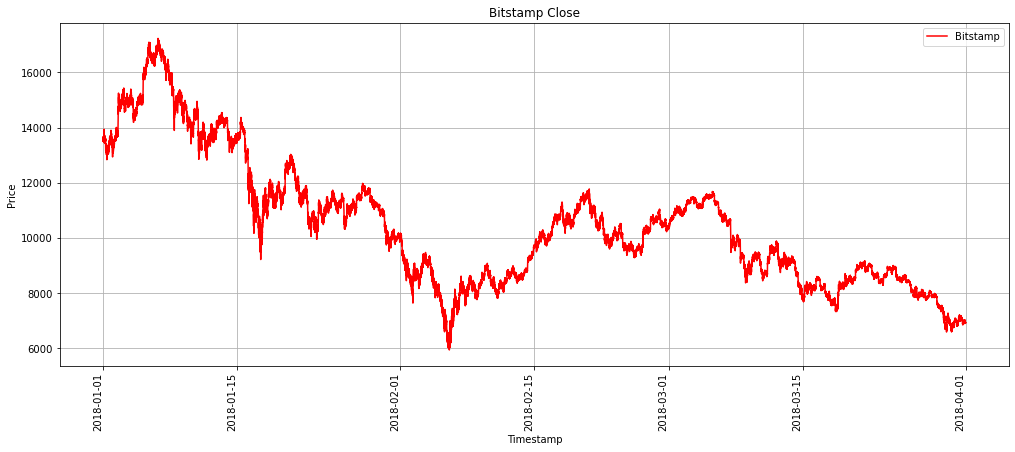

In [50]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
ax = bitstamp_sliced.plot(figsize=(17,7), title="Bitstamp Close", rot=90, color="red", ylabel="Price")
ax.legend(["Bitstamp"])
ax.grid(True)

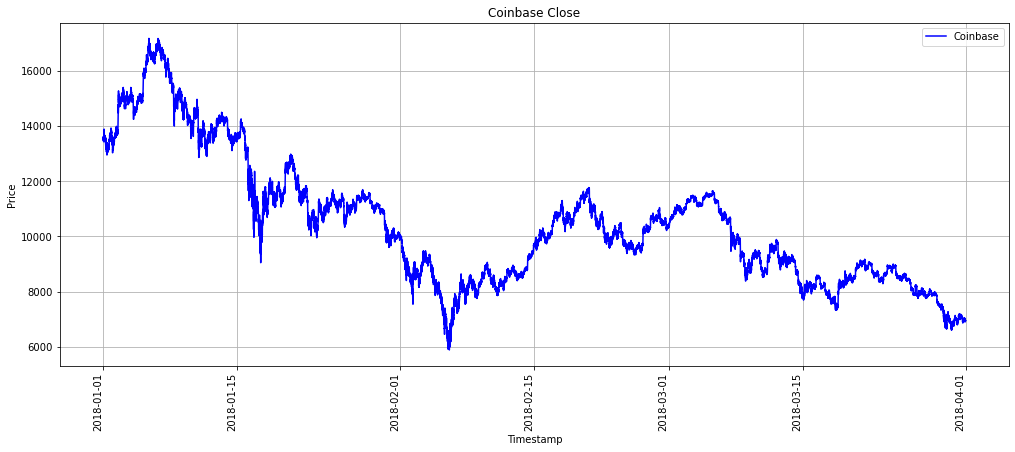

In [51]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
ax = coinbase_sliced.plot(figsize=(17,7), title="Coinbase Close", rot=90, color="blue", ylabel="Price")
ax.legend(["Coinbase"])
ax.grid(True)

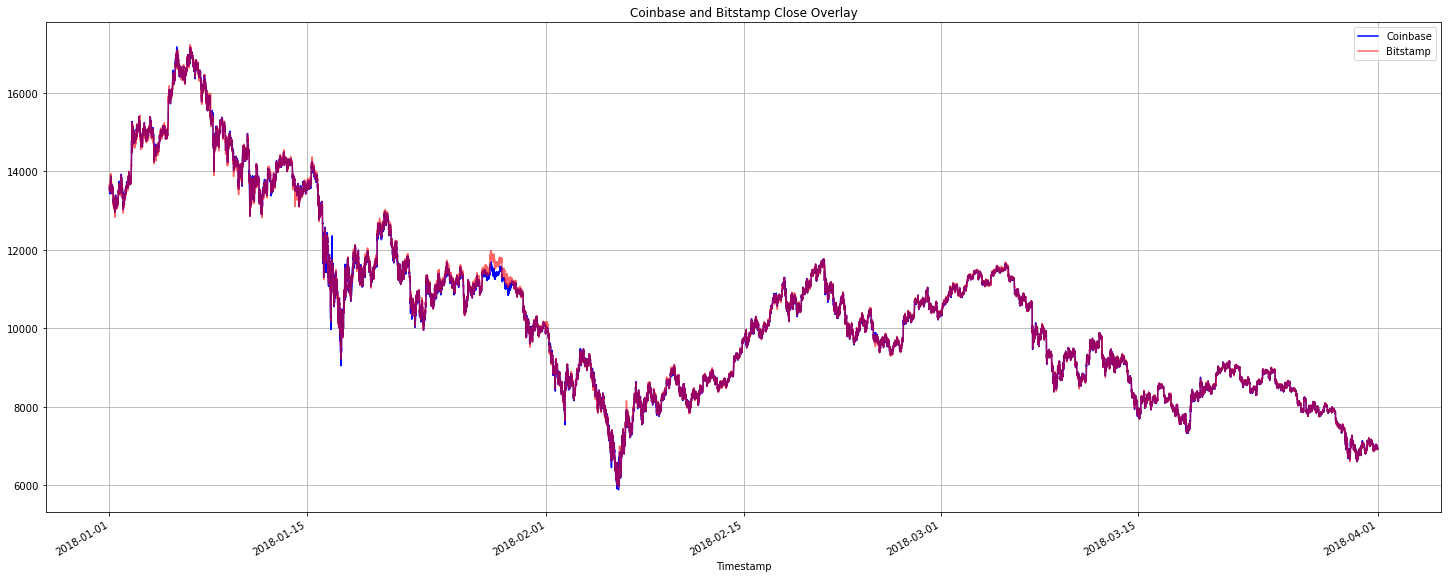

In [52]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax = coinbase_sliced['Close'].plot(figsize=(25,10), rot=90, color="blue", title="Coinbase and Bitstamp Close Overlay",)
bitstamp_sliced['Close'].plot(color="red", alpha=0.6)
ax.legend(["Coinbase", "Bitstamp"])
ax.grid(True)
## In order to add a grid format to the visual I needed to assign the initial plot to a variable then call the .legend and .grid to add my customer legend and grid to the visual

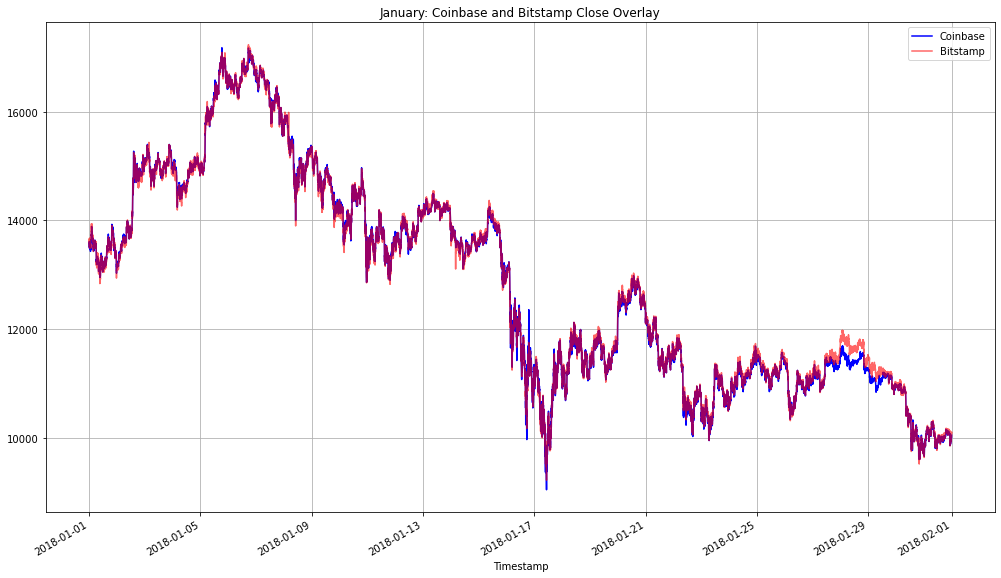

In [53]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label


ax = coinbase_sliced['Close'].loc['2018-01-01':'2018-01-31'].plot(figsize=(17,10), rot=90, color="blue", title="January: Coinbase and Bitstamp Close Overlay")
bitstamp_sliced['Close'].loc['2018-01-01':'2018-01-31'].plot(ax=ax, color="red", alpha=0.6)
ax.legend(['Coinbase', 'Bitstamp'])
ax.grid(True)
## In order to add a grid format to the visual I needed to assign the initial plot to a variable then call the .legend and .grid to add my customer legend and grid to the visual

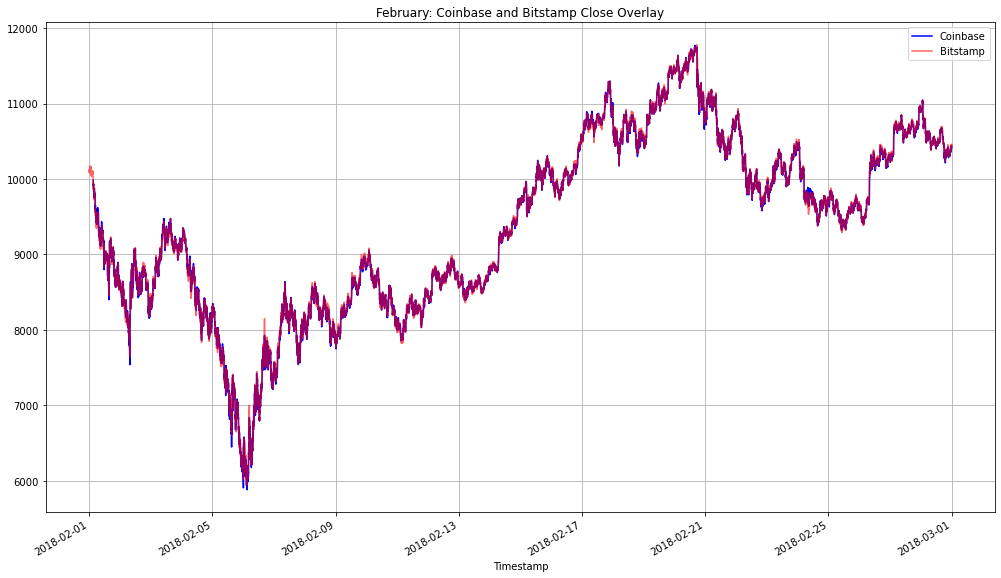

In [54]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
ax = coinbase_sliced['Close'].loc['2018-02-01':'2018-02-28'].plot(figsize=(17, 10), rot=90, color="blue", title="February: Coinbase and Bitstamp Close Overlay")
bitstamp_sliced['Close'].loc['2018-02-01':'2018-02-28'].plot(ax=ax, color="red", alpha=0.6)
ax.legend(["Coinbase", "Bitstamp"])
ax.grid(True)
## In order to add a grid format to the visual I needed to assign the initial plot to a variable then call the .legend and .grid to add my customer legend and grid to the visual

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, in January of 2018 there were several variances between the close price of Bitstamp and Coinbase. However, once we progress into February of 2018 those spreads begin to tighten up on a more consistent basis.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

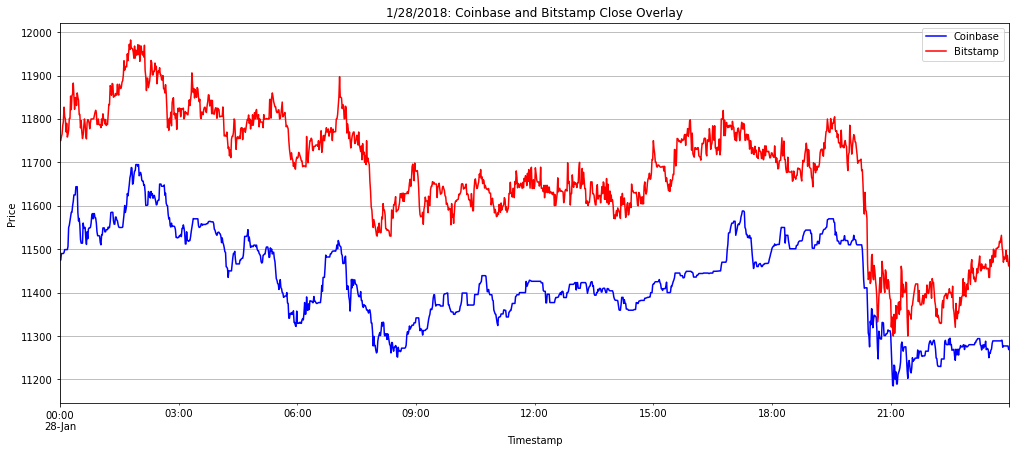

In [55]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

ax = coinbase_sliced['Close'].loc['2018-01-28':'2018-01-28'].plot(figsize=(17,7), ylabel='Price', rot=90, title="1/28/2018: Coinbase and Bitstamp Close Overlay", color='blue')
bitstamp_sliced['Close'].loc['2018-01-28':'2018-01-28'].plot(ax=ax, color='red')
ax.legend(['Coinbase', 'Bitstamp'])
ax.grid(True)
## In order to add a grid format to the visual I needed to assign the initial plot to a variable then call the .legend and .grid to add my customer legend and grid to the visual

In [56]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced['Close'].loc['2018-01-28':'2018-01-28'] - coinbase_sliced['Close'].loc['2018-01-28':'2018-01-28']

# Generate summary statistics for the early DataFrame
display(round(arbitrage_spread_early.sum(),2))
arbitrage_spread_early.describe()

355485.14

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early Arbitrage Box Plot'}>

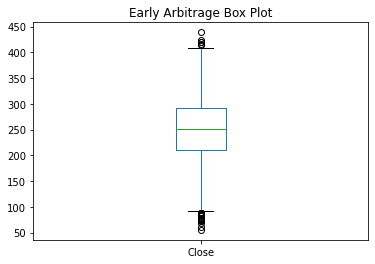

In [57]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot.box(title="Early Arbitrage Box Plot")

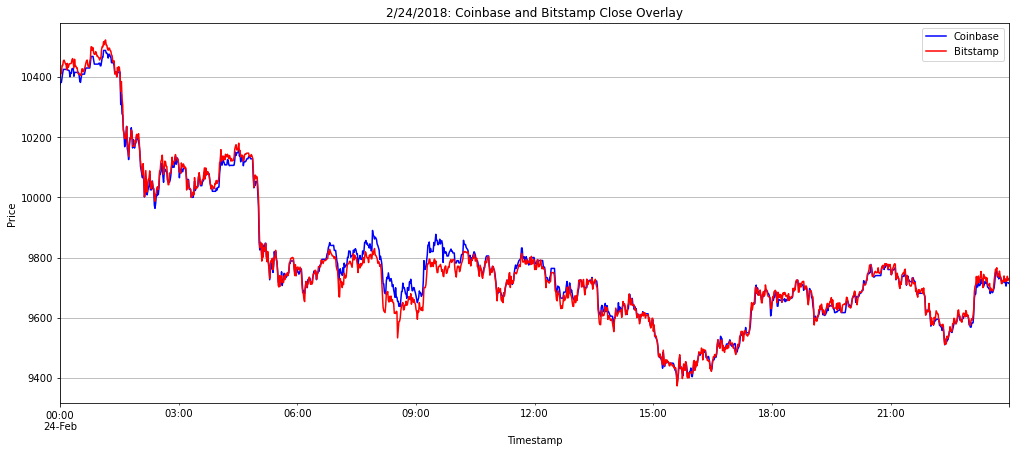

In [58]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = coinbase_sliced['Close'].loc['2018-02-24':'2018-02-24'].plot(figsize=(17,7), ylabel='Price', rot=90, title="2/24/2018: Coinbase and Bitstamp Close Overlay", color='blue')
bitstamp_sliced['Close'].loc['2018-02-24':'2018-02-24'].plot(ax=ax, color='red')
ax.legend(['Coinbase', 'Bitstamp'])
ax.grid(True)
## In order to add a grid format to the visual I needed to assign the initial plot to a variable then call the .legend and .grid to add my customer legend and grid to the visual

In [59]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-02-24':'2018-02-24'] - bitstamp_sliced['Close'].loc['2018-02-24':'2018-02-24']

# Generate summary statistics 
display(round(arbitrage_spread_middle.sum(),2))
arbitrage_spread_middle.describe()

4880.24

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Middle Arbitrage Box Plot'}>

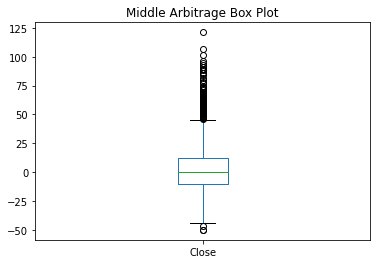

In [60]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot.box(title="Middle Arbitrage Box Plot")

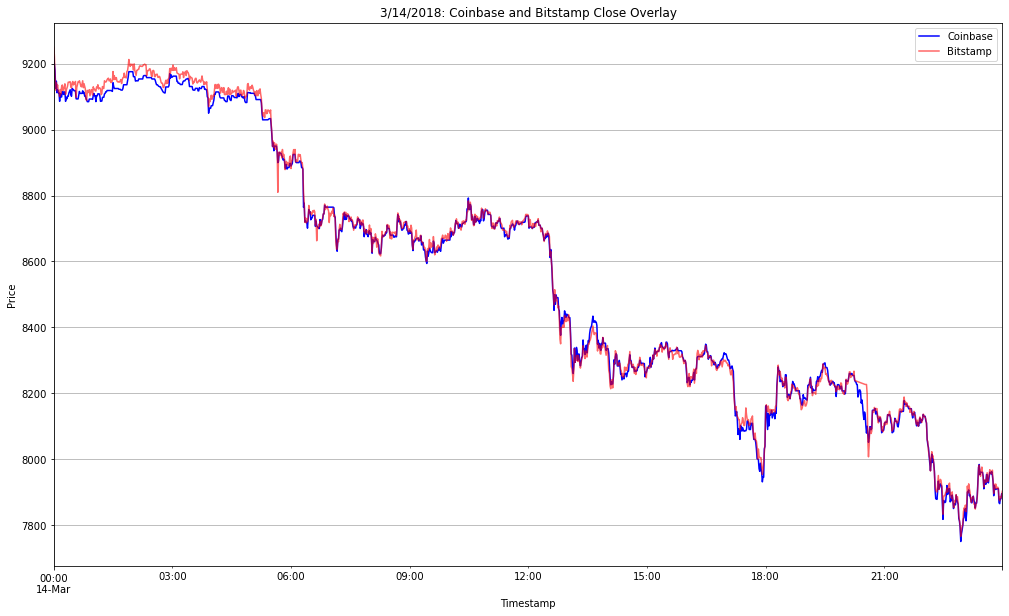

In [61]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = coinbase_sliced['Close'].loc['2018-03-14':'2018-03-14'].plot(figsize=(17,10), ylabel='Price', alpha=1, rot=90, title="3/14/2018: Coinbase and Bitstamp Close Overlay", color='blue')
bitstamp_sliced['Close'].loc['2018-03-14':'2018-03-14'].plot(ax=ax, color='red', alpha=0.6)
ax.legend(['Coinbase', 'Bitstamp'])
ax.grid(True)
## In order to add a grid format to the visual I needed to assign the initial plot to a variable then call the .legend and .grid to add my customer legend and grid to the visual


In [62]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced['Close'].loc['2018-03-14':'2018-03-14'] - coinbase_sliced['Close'].loc['2018-03-14':'2018-03-14']
display(round(arbitrage_spread_late.sum(),2))
# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

9592.25

count    1425.000000
mean        6.731404
std        16.322187
min       -90.010000
25%        -2.910000
50%         6.000000
75%        16.600000
max       147.650000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Late Arbitrage Box Plot'}>

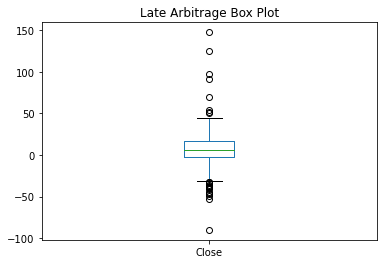

In [63]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot.box(title="Late Arbitrage Box Plot")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [64]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced['Close'].loc['2018-01-28':'2018-01-28'] - coinbase_sliced['Close'].loc['2018-01-28':'2018-01-28']

arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-02-24':'2018-02-24'] - bitstamp_sliced['Close'].loc['2018-02-24':'2018-02-24']

arbitrage_spread_late = bitstamp_sliced['Close'].loc['2018-03-14':'2018-03-14'] - coinbase_sliced['Close'].loc['2018-03-14':'2018-03-14']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
display(f'Arbitrage Spread Early:')
display(arbitrage_spread_early[arbitrage_spread_early > 0].describe())
display("")
display('---------------------------')
display("")
display(f'Arbitrage Spread middle:')
display(arbitrage_spread_middle[arbitrage_spread_middle > 0].describe())
display("")
display('---------------------------')
display("")
display(f'Arbitrage Spread Late:')
display(arbitrage_spread_late[arbitrage_spread_late > 0].describe())


'Arbitrage Spread Early:'

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

''

'---------------------------'

''

'Arbitrage Spread middle:'

count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64

''

'---------------------------'

''

'Arbitrage Spread Late:'

count    956.000000
mean      14.774121
std       12.422690
min        0.010000
25%        5.912500
50%       11.935000
75%       21.350000
max      147.650000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [65]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / coinbase_sliced['Close'].loc['2018-01-28':'2018-01-28']

spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp_sliced['Close'].loc['2018-02-24':'2018-02-24']

spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / coinbase_sliced['Close'].loc['2018-03-14':'2018-03-14']

# Review the spread return DataFrame

display('Spread Return Early:')
display(spread_return_early.describe())
display('')
display('---------------------------')
display('')
display('Spread Return middle:')
display(spread_return_middle.describe())
display('')
display('---------------------------')
display('')
display('Spread Return Late:')
display(spread_return_late.describe())

'Spread Return Early:'

count    1436.000000
mean        0.021648
std         0.005961
min         0.004885
25%         0.018369
50%         0.021897
75%         0.025292
max         0.038510
Name: Close, dtype: float64

''

'---------------------------'

''

'Spread Return middle:'

count    713.000000
mean       0.002048
std        0.002133
min        0.000001
25%        0.000524
50%        0.001280
75%        0.002820
max        0.012726
Name: Close, dtype: float64

''

'---------------------------'

''

'Spread Return Late:'

count    956.000000
mean       0.001694
std        0.001446
min        0.000001
25%        0.000686
50%        0.001391
75%        0.002430
max        0.018276
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [66]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]

profitable_trades_late = spread_return_late[spread_return_late > 0.01]
# Review the first five profitable trades
display('Profitable Trades Early:')
display(profitable_trades_early.head())
display('')
display('---------------------------')
display('')
display('Profitable Trades middle:')
display(profitable_trades_middle.head())
display('')
display('---------------------------')
display('')
display('Profitable Trades Late:')
display(profitable_trades_late.head())

'Profitable Trades Early:'

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

''

'---------------------------'

''

'Profitable Trades middle:'

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

''

'---------------------------'

''

'Profitable Trades Late:'

Timestamp
2018-03-14 20:31:00    0.011296
2018-03-14 20:32:00    0.015508
2018-03-14 20:33:00    0.018276
2018-03-14 20:34:00    0.012002
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [67]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display('Profitable Trades Early:')
display(profitable_trades_early.describe())
display('')
display('---------------------------')
display('')
display('Profitable Trades middle:')
display(profitable_trades_middle.describe())
display('')
display('---------------------------')
display('')
display('Profitable Trades Late:')
display(profitable_trades_late.describe())

'Profitable Trades Early:'

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

''

'---------------------------'

''

'Profitable Trades middle:'

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64

''

'---------------------------'

''

'Profitable Trades Late:'

count    4.000000
mean     0.014271
std      0.003244
min      0.011296
25%      0.011826
50%      0.013755
75%      0.016200
max      0.018276
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [68]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced['Close'].loc['2018-01-28':'2018-01-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
Name: Close, dtype: float64

In [69]:
# For the date middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp_sliced['Close'].loc['2018-02-24':'2018-02-24']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the middle profit DataFrame
profit_per_trade_middle.head()

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64

In [70]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * coinbase_sliced['Close'].loc['2018-03-14':'2018-03-14']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the late profit DataFrame
profit_per_trade_late.head()

Timestamp
2018-03-14 20:31:00     91.89
2018-03-14 20:32:00    125.63
2018-03-14 20:33:00    147.65
2018-03-14 20:34:00     97.22
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [71]:
# Generate the summary statistics for the early profit per trade DataFrame
display('Profit Per Trade Early:')
display(profit_per_trade_early.describe())
display('')
display('---------------------------')
display('')
display('Profit Per Trade middle:')
display(profit_per_trade_middle.describe())
display('')
display('---------------------------')
display('')
display('Profit Per Trade Late:')
display(profit_per_trade_late.describe())

'Profit Per Trade Early:'

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

''

'---------------------------'

''

'Profit Per Trade middle:'

count      3.000000
mean     110.023333
std       10.129246
min      101.750000
25%      104.375000
50%      107.000000
75%      114.160000
max      121.320000
Name: Close, dtype: float64

''

'---------------------------'

''

'Profit Per Trade Late:'

count      4.000000
mean     115.597500
std       25.998666
min       91.890000
25%       95.887500
50%      111.425000
75%      131.135000
max      147.650000
Name: Close, dtype: float64

Text(0, 0.5, 'Cumulative Profits $')

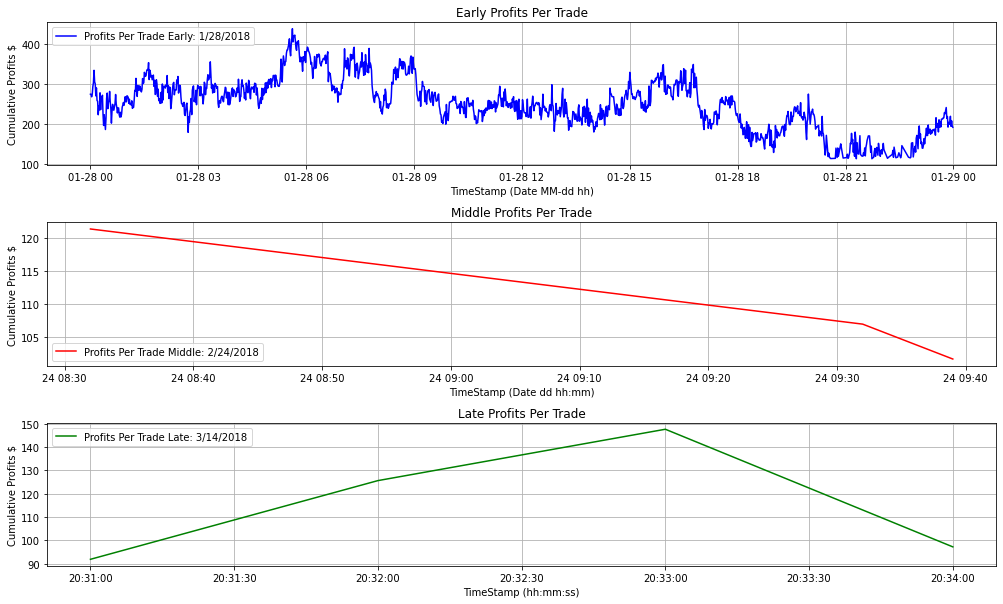

In [72]:
# Plot the results for the early profit per trade DataFrame
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(17,10))

# profit_per_trade_early.plot(ax = axes[0], subplots=True, rot=90, title="Profit Per Trade", ylabel='Profit Per Trade')

# profit_per_trade_middle.plot(ax = axes[1], subplots=True, rot=90, title="Profit Per Trade", ylabel='Profit Per Trade')

# profit_per_trade_late.plot(ax = axes[2], subplots=True, rot=90, title="Profit Per Trade", ylabel='Profit Per Trade')

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(17,10))
plt.subplots_adjust(hspace=.4)

ax1.plot(profit_per_trade_early, color='blue')

ax2.plot(profit_per_trade_middle, color='red')

ax3.plot(profit_per_trade_late, color='green')

ax1.legend(['Profits Per Trade Early: 1/28/2018'],loc="upper left")
ax2.legend(['Profits Per Trade Middle: 2/24/2018'],loc="lower left")
ax3.legend(['Profits Per Trade Late: 3/14/2018'],loc="upper left")

ax1.set_title('Early Profits Per Trade')
ax2.set_title('Middle Profits Per Trade')
ax3.set_title('Late Profits Per Trade')

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

ax1.set_xlabel('TimeStamp (Date MM-dd hh)')
ax1.set_ylabel('Cumulative Profits $')

ax2.set_xlabel('TimeStamp (Date dd hh:mm)')
ax2.set_ylabel('Cumulative Profits $')

ax3.set_xlabel('TimeStamp (hh:mm:ss)')
ax3.set_ylabel('Cumulative Profits $')

## Instead of creating 3 separate outputs I decided to combine all 3 outputs into a singular image that would make it easier (in my opinion) to digest
## To accomplish this I needed to create a figure with 3 attributes and pass in my variable to those attributes to be plotted
## Once plotted I could then customize each line graph's grid, xlabel, ylable, title, legend, and color. 
## One thing that I though was cool was the ability to adjust the spacing between graphs using plt.suplots_adjust(hspace=''). This allowed me to customize the labeling with minimal overlay or confusion


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [73]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame

print(f'The total profit made for the early arbitrage = {round(profit_per_trade_early.sum(),2)}')

The total profit made for the early arbitrage = 349918.29


In [74]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
print(f'The total profit made for the middle arbitrage = {round(profit_per_trade_middle.sum(),2)}')

The total profit made for the middle arbitrage = 330.07


In [75]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
print(f'The total profit made for the late arbitrage = {round(profit_per_trade_late.sum(),2)}')

The total profit made for the late arbitrage = 462.39


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [76]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early =  profit_per_trade_early.cumsum()

cumulative_profit_middle =  profit_per_trade_middle.cumsum()

cumulative_profit_late =  profit_per_trade_late.cumsum()


Text(0, 0.5, 'Cumulative Profits $')

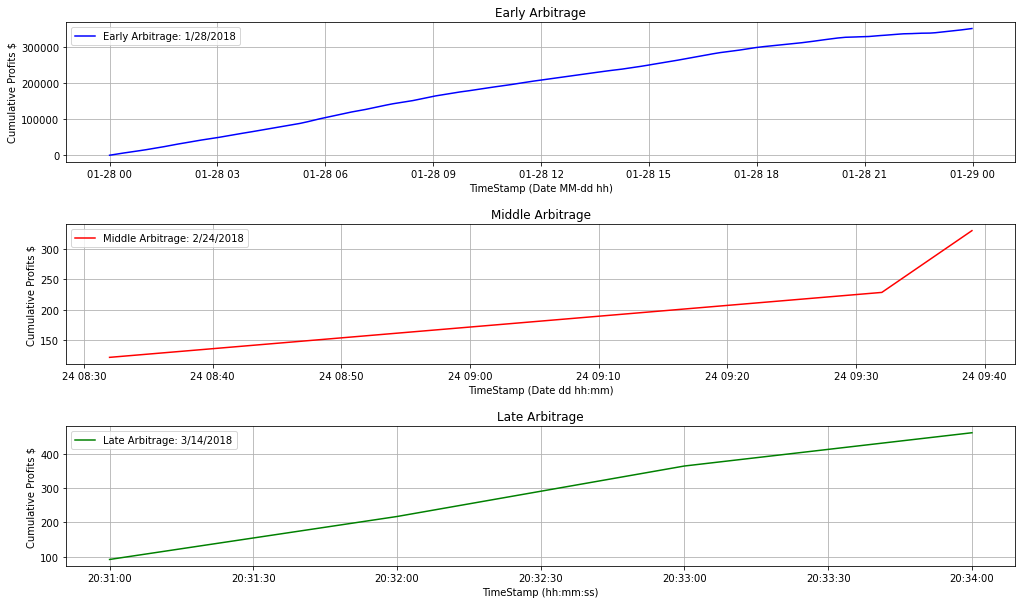

In [77]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(17,10))
plt.subplots_adjust(hspace=.45)

ax1.plot(cumulative_profit_early, color='blue')

ax2.plot(cumulative_profit_middle, color='red')

ax3.plot(cumulative_profit_late, color='green')

ax1.legend(['Early Arbitrage: 1/28/2018'],loc="upper left")
ax2.legend(['Middle Arbitrage: 2/24/2018'],loc="upper left")
ax3.legend(['Late Arbitrage: 3/14/2018'],loc="upper left")

ax1.set_title('Early Arbitrage')
ax2.set_title('Middle Arbitrage')
ax3.set_title('Late Arbitrage')

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

ax1.set_xlabel('TimeStamp (Date MM-dd hh)')
ax1.set_ylabel('Cumulative Profits $')

ax2.set_xlabel('TimeStamp (Date dd hh:mm)')
ax2.set_ylabel('Cumulative Profits $')

ax3.set_xlabel('TimeStamp (hh:mm:ss)')
ax3.set_ylabel('Cumulative Profits $')

## Instead of creating 3 separate outputs I decided to combine all 3 outputs into a singular image that would make it easier (in my opinion) to digest
## To accomplish this I needed to create a figure with 3 attributes and pass in my variable to those attributes to be plotted
## Once plotted I could then customize each line graph's grid, xlabel, ylable, title, legend, and color. 
## One thing that I though was cool was the ability to adjust the spacing between graphs using plt.suplots_adjust(hspace=''). This allowed me to customize the labeling with minimal overlay or confusion


**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** After the initial big arbitrage at the beginning of the dataset on 1/28/2018 opportunities for Arbitrage became scarce the further away from that event you got. By the time we made it to the month of March we were only finding a handful of opportunities after combing through the data with a magnifying glass, and each opportunity only lasted for a short amount of time. 